# Let's get into 

<img src="https://www.gelestatic.it/thimg/NTnDnRY33bExL8Hmmn2VnwjHDDs=/fit-in/960x540/https%3A//www.lastampa.it/image/contentid/policy%3A1.33596732%3A1561901170/570024ce-2fc3-11e9-9516-6327b7720fee_google_reddit_acquisizione-kllD-U11202209014162EGI-1024x576%40LaStampa.it.png%3Ff%3Ddetail_558%26h%3D720%26w%3D1280%26%24p%24f%24h%24w%3D5bc7233" />

# What is it?

Reddit is a social media based on social news media aggregation. As a Redditor, a reddit's user, you can create posts. The most important thing about posts is that they are organized into subject's clusters. Those are also called as subreddits.  

<img src="https://i.redd.it/9a7zda77s7z01.png" width=1200 heigth=1000 align="center"/>

# What do those r/ things contain?

What a subreddit does is gather informations which concern itself.   
Indeed, what it contains is actually defined in it's name. For example, if we are looking for games discussion/guides and so on, the first thing we'd be looking at is r/games.

<img src="Images/games.png"/>

# Subreddits... how are they created?

Subreddits are not pre-created. Indeed, any user can create a subreddit and promote it. 
If a subreddit has some interesting contents users can upvote or downvote discussions and comments.
Discussions with an high number of upvotes have the possibility to get on top of the subreddit page and, if the number of upvotes is very high, it can also be displayed in the home page of reddit. 

# Ok thank you but now...

<img src="https://secure.meetupstatic.com/photos/event/e/1/6/b/highres_457317707.jpeg"/>

# Getting tokens for OAuth in order to authenticate

In order to be able to use Reddit API, after we have created our account, we need to obtain two tokens:
* **client id**
* **client secret**

To get those, we need to log in in reddit, go to ***Preferences->Apps->Create a new app***

<img src="Images/create_newapp.png"/>

Let's now fill all the information:
* **name**: give your app a name, maybe a good one whic explains what it does.
* **app type**: we are going to choose script, since that's all we need.
* **description**: type a little description of what the app does
* **about url**: link to information about the app, we can leave this blank if we want
* **redirect uri**: we can just to paste this link *http://www.example.com/unused/redirect/uri*


After filling those fields, just click on create app.

In the displaying page let's save our app's client ID and secret:

<img src="Images/secret.png"/>

# Still before showing some code..

In order to code we need to define the last things:
* We are going to use python as programming language
* We are going to use the PRAW library in order to work with reddit api

# Install PRAW library

If you are running linux, you can just open your terminal and type 


pip install praw

If running python on anaconda just type


conda install -c conda-forge praw 

# FINALLY, let's dive into coding!

Praw offers a connector between us and reddit. What we need to do is create an instace of reddit passing our username, password, client ID, client secret and the user agent.

reddit = praw.Reddit(client_id='my client id',
                     client_secret='my client secret',
                     username='my username',
                     password='my password',
                     user_agent='my user agent')

In order to avoid to hard-code our credentials inside our script program, let's just create a new python file, called config, in the same directory where our script is located and write our credentials in there.

<img src="Images/no_hardcode.jpg" width=50% height=50%/>

# config.py

<img src="Images/config.png"/>

# Let's now create our main script

Create a new python file and name it whatever you want. This will be the script in which we will do all of our work.

Let's authenticate on reddit using the praw connector:

In [1]:
import praw
import config #this imports the file we cerated befor with our credentials

reddit = praw.Reddit(client_id = config.client_id,
                     client_secret = config.client_secret,
                     username = config.username,
                     password = config.password,
                     user_agent = config.user_agent)

# Let's choose a subreddit to analyze

In this tutorial, we are going to start analyzing r/coronavirus.. let's see what we'll find out!

In [2]:
from tqdm import tqdm

#obtaining an instance of r/coronavirus
r_corona = reddit.subreddit('coronavirus')

#let's see what are the top 2 posts made in this subreddit this month
for post in tqdm(r_corona.top('month', limit=2)):
    print (post.title)
    print('\n')

2it [00:01,  1.74it/s]

Gino Fasoli was 73 years old. He was italian and he was a family doctor and an emergency room manager. In Africa they even kidnapped him to cure the sick. Then he retired. Days ago he received a phone call: "Can you help us out?".He came back. He was infected by Covid-19. He died like a true hero.


How to stop a virus from spreading




# Save some data from the top 200 posts

Let's create a dictionary which will contain our interesting data

In [3]:
import pandas as pd
from datetime import datetime

post_stats = []

#taking the top 200 posts made this year
for post in tqdm(r_corona.top('year', limit=200)):
    if post.author: #removing all the none accounts
        data = {
            'id' : post.id,
            'title' : post.title,
            'num_comments' : post.num_comments,
            'score' : post.score,
            'upvote_ratio' : post.upvote_ratio,
            'date' : datetime.utcfromtimestamp(post.created_utc),
            'author' : post.author.name
        }

        post_stats.append(data)
#data example
print(post_stats[0])

200it [11:58,  3.59s/it]

{'id': 'fgi2pi', 'title': 'Even if COVID-19 is unavoidable, delaying infections can flatten the peak number of illnesses to within hospital capacity and significantly reduce deaths.', 'num_comments': 4405, 'score': 128069, 'upvote_ratio': 0.96, 'date': datetime.datetime(2020, 3, 10, 18, 4, 1), 'author': 'finchdad'}


Let's now save those data in a dataframe, which is a very useful and efficient data structure and start some analysis.

In [4]:
coronaStats = pd.DataFrame(post_stats)

#Get the top upvoted post
maxTopVoted = coronaStats[coronaStats['upvote_ratio'] == coronaStats['upvote_ratio'].max()]
maxTopVoted

,id,title,num_comments,score,upvote_ratio,date,author
186,fjfv80,4 of 4 babies test negative for coronavirus af...,611,25372,0.98,2020-03-16 05:34:58,TooFewForTwo


# Let's now see if there are and who are the top authors

We are going to do this just considering the number of occurences in our data of a certain user, since we are looking at the top posts. If a user appears more than once, it means he has created a succesful post more than once.

In [5]:
#display the number of top posts createdby a user
coronaStats.author.value_counts()

Frocharocha          4
mythrowawaybabies    4
Trooper9520          4
skuzgang             4
WorkTomorrow         4
                    ..
coffee_lake_tree     1
birdcore             1
chirex               1
AdamCannon           1
the_tico_life        1
Name: author, Length: 164, dtype: int64

The most succesful redditor here is the user 'Frocharocha'. Let's get some infos about him

In [20]:
user = reddit.redditor('Frocharocha')
fr_stats = []

#let's look at some of his new activities 
for sub in tqdm(user.submissions.new(limit=50)):
    data = {
        'id' : sub.id,
        'title' : sub.title,
        'num_comments' : sub.num_comments,
        'score' : sub.score,
        'upvote_ratio' : sub.upvote_ratio,
        'date' : datetime.utcfromtimestamp(sub.created_utc),
        'author' : sub.author.name,
        'nsfw' : sub.over_18,
        'subreddit' : sub.subreddit.title
    }
    fr_stats.append(data)
fr_stats[0]

50it [01:09,  1.38s/it]


{'id': 'ficm32',
 'title': "Here's my take on the Doom Eternal: Nintendo Switch Edition",
 'num_comments': 374,
 'score': 22535,
 'upvote_ratio': 0.91,
 'date': datetime.datetime(2020, 3, 14, 3, 55, 26),
 'author': 'Frocharocha',
 'nsfw': False,
 'subreddit': 'Nintendo Switch - News, Updates, & Information'}

In [23]:
#Check if he interacts also on other subreddits
frDf = pd.DataFrame(fr_stats)
frDf.groupby('subreddit').head()


,id,title,num_comments,score,upvote_ratio,date,author,nsfw,subreddit
0,ficm32,Here's my take on the Doom Eternal: Nintendo S...,374,22535,0.91,2020-03-14 03:55:26,Frocharocha,False,"Nintendo Switch - News, Updates, & Information"
1,g0iivf,"""Cells at Work! Code Black"" anime announced fo...",1,5,1.00,2020-04-13 13:02:42,Frocharocha,False,Cells At Work - Hataraku Saibou - Bacteria At ...
2,g0ii4h,"""Cells at Work! Code Black"" anime announced fo...",19,36,1.00,2020-04-13 13:01:16,Frocharocha,False,/r/Anime
3,g0h9ly,More Resident Evil 4 Remake details emerge: ‘L...,8,33,0.93,2020-04-13 11:35:06,Frocharocha,False,"The place for gaming leaks, rumours and news"
4,g0h869,VGC: More Resident Evil 4 Remake details emerg...,9,6,1.00,2020-04-13 11:32:06,Frocharocha,False,Resident Evil
5,g0h806,More Resident Evil 4 Remake details emerge: ‘L...,0,1,0.57,2020-04-13 11:31:41,Frocharocha,False,/r/XboxOne - The home of everything Xbox One o...
6,g0h7yy,More Resident Evil 4 Remake details emerge: ‘L...,15,11,0.73,2020-04-13 11:31:37,Frocharocha,False,PC Gaming
7,g0gtzc,The Legend of Zelda: Breath of the Wild is now...,3,0,0.52,2020-04-13 11:02:35,Frocharocha,False,"Nintendo Switch - News, Updates, & Information"
8,g0gti9,Rio statue at the end of the Easter Day lit up...,0,10,0.81,2020-04-13 11:01:32,Frocharocha,False,Reddit Pics
9,g0gs65,Coronavirus fuels calls to clamp down on EU wi...,2,18,0.78,2020-04-13 10:58:46,Frocharocha,False,Novel Coronavirus (COVID-19)


# Check his popularity among all of this subreddit

We will now make some plots in order to show some stats about his popularity on those subreddits. We are now going to see some posts he has created.

# Mean comments of the user's posts for each different subreddit 

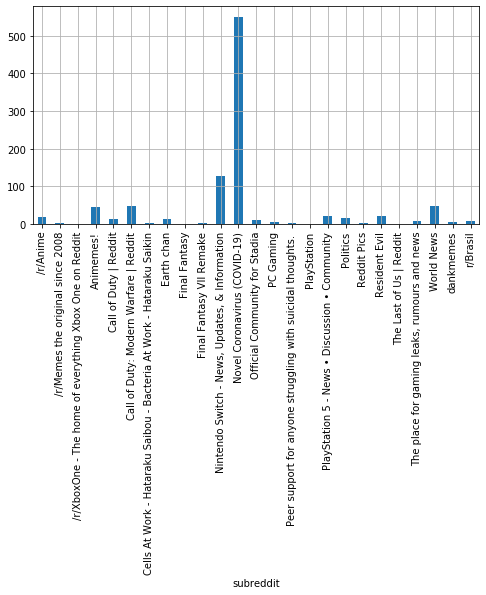

In [24]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8,4))
frDf.groupby('subreddit')['num_comments'].mean().plot.bar()
plt.grid()
plt.show()

# Mean upvote ratio of the user's posts for each different subreddit

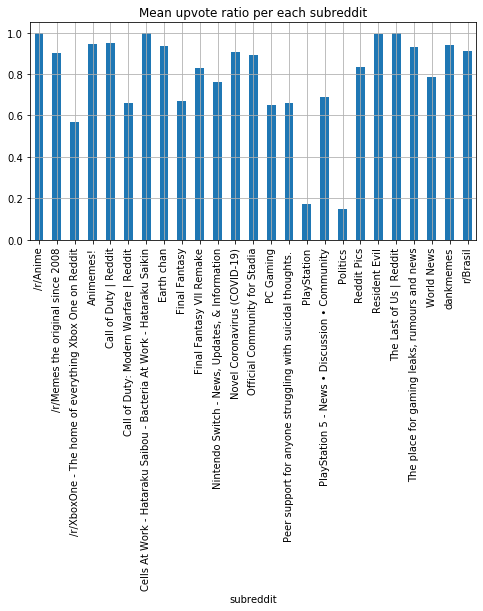

In [27]:
plt.figure(figsize=(8,4))
frDf.groupby('subreddit')['upvote_ratio'].mean().plot.bar()
plt.title("Mean upvote ratio per each subreddit for the user's submit")
plt.grid()
plt.show()

# Mean score of the user's posts for each different subreddit 

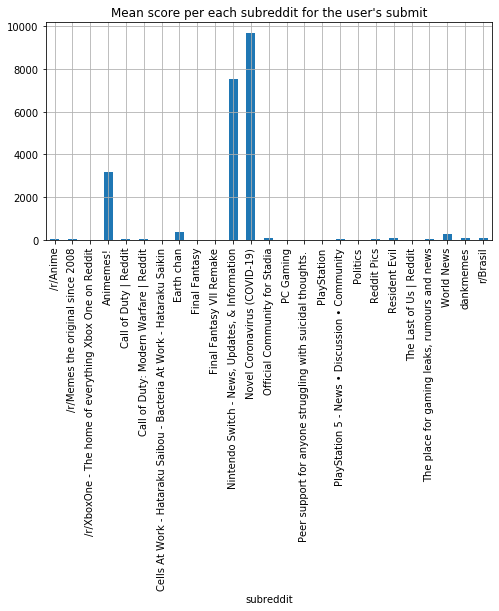

In [28]:
plt.figure(figsize=(8,4))
frDf.groupby('subreddit')['score'].mean().plot.bar()
plt.title("Mean score per each subreddit for the user's submit")
plt.grid()
plt.show()

# Get back to our subreddit 

We are now going to check the relationship between the number of comments and the post's score in our original subreddit

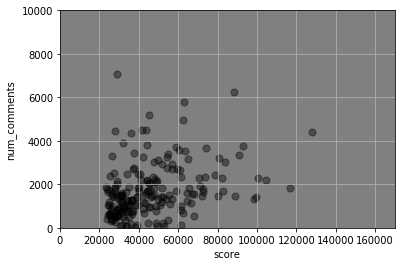

In [30]:
import numpy

ax = coronaStats.plot(grid=True,kind='scatter', x='score', y='num_comments', s=50, c='k', alpha=0.4)
ax.set_xlim((0,170000))
ax.set_ylim((0,10000))
ax.set_facecolor("grey")

# Relationship between the scoreand the upvote ratio

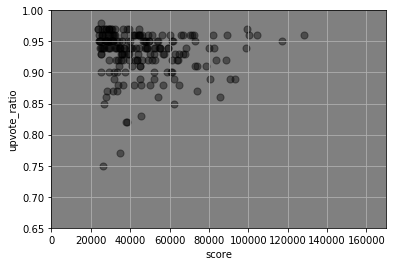

In [12]:
ax = coronaStats.plot(grid=True,kind='scatter', x='score', y='upvote_ratio', s=50, c='k', alpha=0.4)
ax.set_xlim((0,170000))
ax.set_ylim((0.65,1))
ax.set_facecolor("grey")

# Relationship between upvote ratio and number of comments

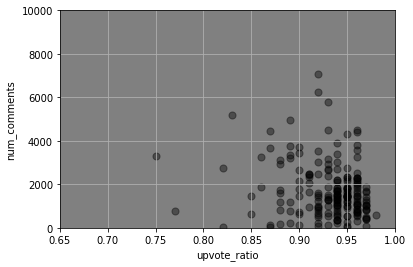

In [13]:
ax = coronaStats.plot(grid=True,kind='scatter', x='upvote_ratio', y='num_comments', s=50, c='k', alpha=0.4)
ax.set_xlim((0.65,1))
ax.set_ylim((0,10000))
ax.set_facecolor("grey")

# Get back to our subreddit and check the submission ratio per day

In [14]:
#making a copy of our dataframe and format the date in the format 2020-03-02
df = coronaStats
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df = df.sort_values(by='date')

#getting the unique days 
dates = df['date'].unique()
posts_per_day = []

#create an empty array of the length of days which are in our dataset
for i in range(0,len(dates)):
    posts_per_day.append(0)

#scanning each row of the dataframe and each row of the date array and incrementing the corresponding cell of posts per day
for i in range(0,len(df)):
    for j in range(0,len(dates)):
        if df['date'].iloc[i] == dates[j]:
            posts_per_day[j] += 1

max(posts_per_day)

9

# Plot the obtained data

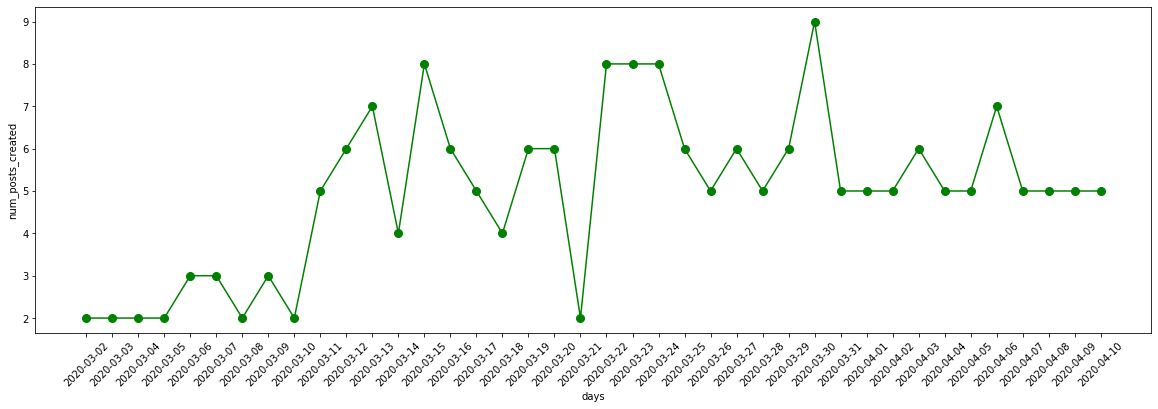

In [15]:
plt.figure(figsize = (20,6))
plt.xticks(rotation=45)
plt.xlabel('days')
plt.ylabel('num_posts_created')
plt.plot(dates, posts_per_day, 'go-', markerfacecolor='g', markersize=8)

# Let's now make the last solid example!

Since we'll need a bit more data to work with, we are going to use another API which helps to cut down the processing time.

# PushShift API

This API was designed and created by the /r/datasets mod team to help provide enhanced functionality and search capabilities for searching Reddit comments and submissions. It gives a really big boost to speed and process time.

Let's now pull a big number of comments from the subreddit we are working with. In order to do so there are two main endpoints used to search all publicly available comments and submissions on Reddit:

*    /reddit/search/comment
*    /reddit/search/submission


So, what we need to do is make a request to the pushshift api adding the endpoint we are interested in:
    https://api.pushshift.io/reddit/search/comment/?subreddit=coronavirus

# This is an example of a response

<img src="Images/pushshift_example.png"/>

# What are we going to do here?

We are going to do some data-visualization using wordcloud API. The end goal will be to create an image made up of the most common words in the comments of our subreddit. 

<img src="Images/wordcloud_example.jpg" width=32% height=32%/>

# Now let's start to write our code!

In [16]:
from wordcloud import WordCloud, STOPWORDS
import requests

#we can just add the name of the subreddit so that we don't have to change everytime the whole link
base_url = 'https://api.pushshift.io/reddit/comment/search/?subreddit=' 

subreddit = 'coronavirus'

#adding the name of our subreddit to the link
url = f"{base_url}{subreddit}" 

#making the request to the api and getting the response
res = requests.get(url)
data = res.json()['data'] #we are going to store the results in a dictionary (look at the response example)



# Solve some problems

Now right now, we have an array of strings. This is a problem because wordcloud api processes a whole document, so what we need to do is just join all of our comments into a unique document.

In [17]:
#joining each comment together of our 'body' in the data
document = " ".join(comment['body'] for comment in data)

# Work with WordCloud API

In [18]:
#create an instance of WordCloud

#generate a wordcloud object
wc = WordCloud().generate(document)

image = wc.to_file('img.png')

<img src="img.png"/>

# Now let's try to make something a bit more aestetichs

We are going to import a shape of an image and fit the text inside of it.. since we are talking about coronavirus we are going to use this image!

<img src="Images/corona.png" width=35% height=35%/>

In [19]:
from os import path
from PIL import Image
import os
import numpy as np


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
corona_mask = np.array(Image.open(path.join(d, 'Images/corona.png')))

#removing some non meaningful words
stopwords = set(STOPWORDS)
stopwords.add("know")
stopwords.add("now")
stopwords.add("many")
stopwords.add("lot")
stopwords.add("much")
stopwords.add("thing")

wc1 = WordCloud(background_color="white", max_words=2000, mask=corona_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
                
wc1.generate(document)

wc1.to_file("corona_w.png")

# And... this is the result!

<img src="corona_w.png" />

# End references

If you are interested in the topic and want to know more here are some references:

* PRAW: https://praw.readthedocs.io/
* PushShift: https://github.com/pushshift/api
* WordCloud: https://github.com/amueller/word_cloud